In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [449]:
data = pd.read_csv('clean_data.csv')

In [450]:
data.head()

,price,brand,ram,ram_type,display_size,display_type,pixels,screen_rate,screen_panel,length,...,cpu_brand,gpu_brand,hdd,ssd,OS,weight,cpu_point,gpu_point,fingerprint_reader,web_camera
0,3049.99,LENOVO,64.0,DDR5,15.6,QHD,3686400.0,165.0,IPS,358.80,...,INTEL,NVIDIA,0.0,2000.0,WINDOWS,2.40,15486.0,8841.0,1.0,0.0
1,1819.00,ACER,32.0,DDR5,15.6,FHD,2073600.0,144.0,IPS,360.40,...,INTEL,NVIDIA,0.0,2000.0,WINDOWS,2.50,15486.0,8864.0,1.0,0.0
2,2359.99,ACER,32.0,DDR4,16.0,WQXGA,4096000.0,165.0,IPS,358.14,...,INTEL,NVIDIA,0.0,1000.0,WINDOWS,2.44,12390.0,8290.0,1.0,0.0
3,1099.99,DELL,16.0,DDR4,14.0,FHD+,2304000.0,60.0,IPS,314.00,...,AMD,AMD,0.0,1000.0,WINDOWS,1.55,10523.0,1129.0,1.0,0.0
4,719.99,LENOVO,16.0,DDR4,15.6,FHD,2073600.0,60.0,IPS,359.20,...,INTEL,INTEL,0.0,1000.0,WINDOWS,1.70,5125.0,1435.0,1.0,0.0


In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               6607 non-null   float64
 1   brand               6607 non-null   object 
 2   ram                 6607 non-null   float64
 3   ram_type            6607 non-null   object 
 4   display_size        6607 non-null   float64
 5   display_type        6607 non-null   object 
 6   pixels              6607 non-null   float64
 7   screen_rate         6607 non-null   float64
 8   screen_panel        6607 non-null   object 
 9   length              6607 non-null   float64
 10  width               6607 non-null   float64
 11  height              6607 non-null   float64
 12  cpu_brand           6607 non-null   object 
 13  gpu_brand           6607 non-null   object 
 14  hdd                 6607 non-null   float64
 15  ssd                 6607 non-null   float64
 16  OS    

## 1. Phân tích các cột dữ liệu dạng category

In [452]:
# get categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(col)

brand
ram_type
display_type
screen_panel
cpu_brand
gpu_brand
OS


In [453]:
# print unique values in each categorical column
for col in cat_cols:
    print(col, ":", data[col].unique())
    

brand : ['LENOVO' 'ACER' 'DELL' 'HP' 'ASUS' 'MSI' 'LG' 'MICROSOFT' 'AORUS'
 'ALIENWARE' 'RAZER' 'PANASONIC' 'SAMSUNG' 'DYNABOOK' 'GIGABYTE' 'ENVY']
ram_type : ['DDR5' 'DDR4' 'LPDDR4X' 'LPDDR5' 'LPDDR4' 'LPDDR3']
display_type : ['QHD' 'FHD' 'WQXGA' 'FHD+' 'HD+' 'HD' 'WQHD' 'WQUXGA' 'QHD+' 'WUXGA'
 '4K UHD' '2.5K' '2.2K' '2.8K' 'PIXELSENSE' '3.5K' 'UHD+' '3K' '3K2K' '2K'
 '3.2K' 'WUXGA+' 'WQHD+' '4K UHD+']
screen_panel : ['IPS' 'TN' 'OLED']
cpu_brand : ['INTEL' 'AMD' 'SNAPDRAGON']
gpu_brand : ['NVIDIA' 'AMD' 'INTEL' 'QUALCOMM']
OS : ['WINDOWS' 'CHROME OS']


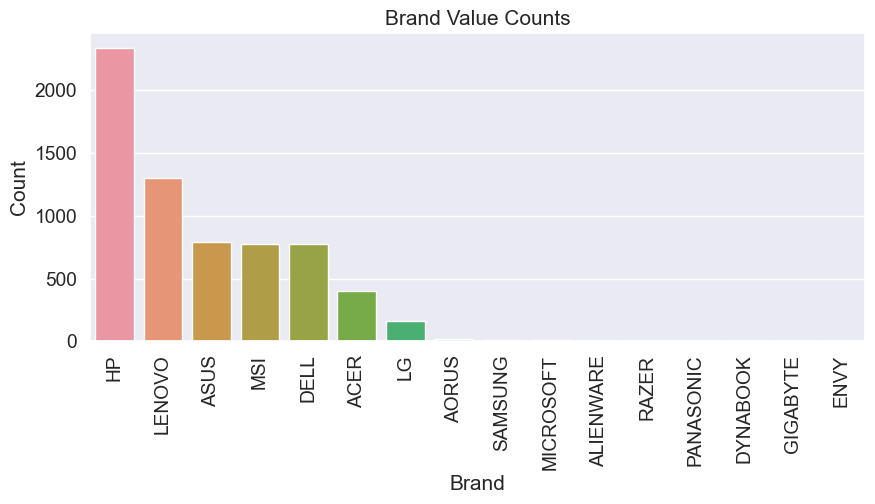

In [454]:
# plot brand value counts sorted
plt.figure(figsize=(10, 4))
sns.countplot(x = data['brand'], data = data, order = data['brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Brand Value Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

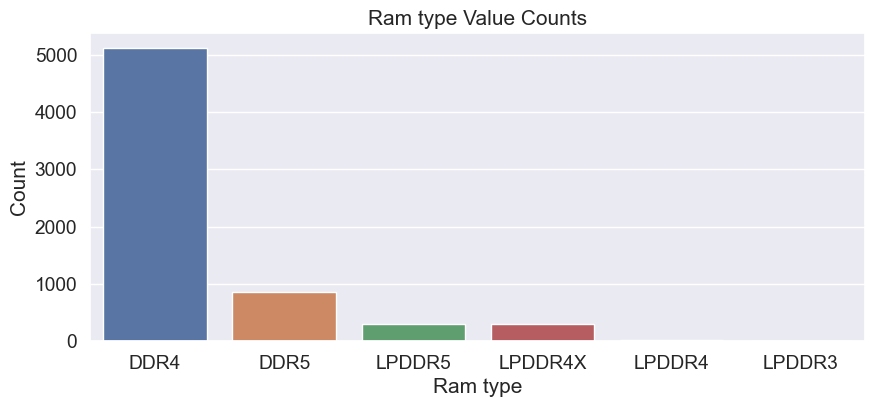

In [455]:
# plot brand value counts sorted
plt.figure(figsize=(10, 4))
sns.countplot(x=data['ram_type'], data=data,
              order=data['ram_type'].value_counts().index)
plt.title('Ram type Value Counts')
plt.xlabel('Ram type')
plt.ylabel('Count')
plt.show()


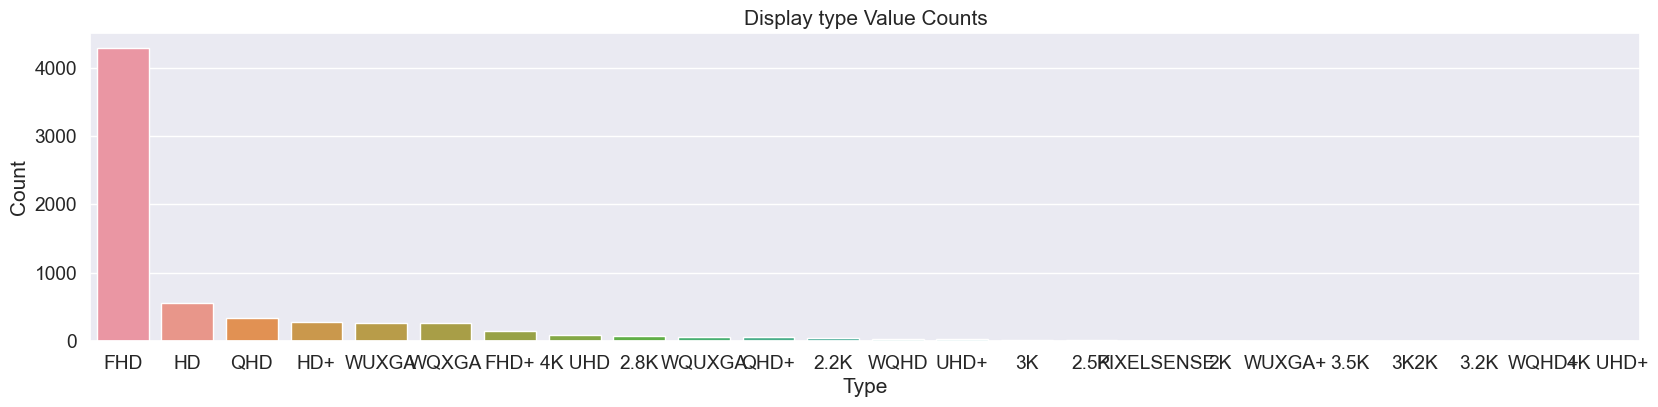

In [456]:
# plot brand value counts sorted
plt.figure(figsize=(20, 4))
sns.countplot(x=data['display_type'], data=data,
              order=data['display_type'].value_counts().index)
plt.title('Display type Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


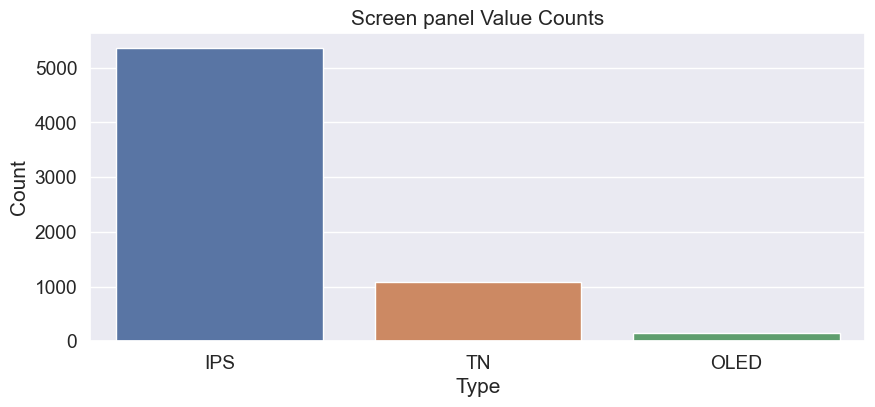

In [457]:
# plot brand value counts sorted
plt.figure(figsize=(10, 4))
sns.countplot(x=data['screen_panel'], data=data,
              order=data['screen_panel'].value_counts().index)
plt.title('Screen panel Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


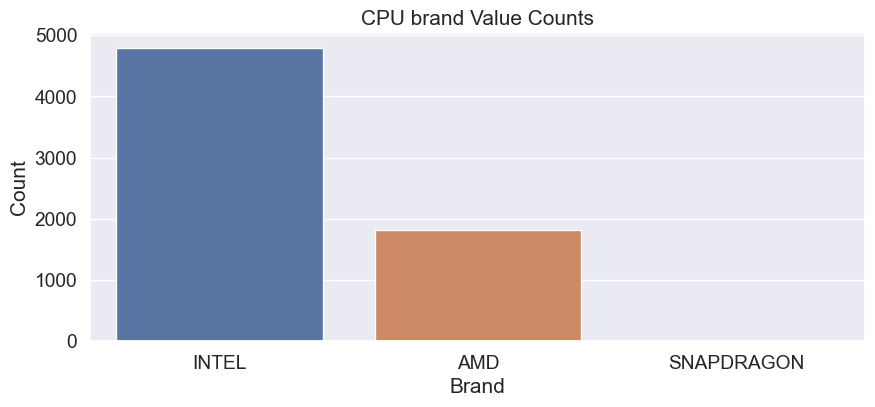

In [458]:
# plot brand value counts sorted
plt.figure(figsize=(10, 4))
sns.countplot(x=data['cpu_brand'], data=data,
              order=data['cpu_brand'].value_counts().index)
plt.title('CPU brand Value Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


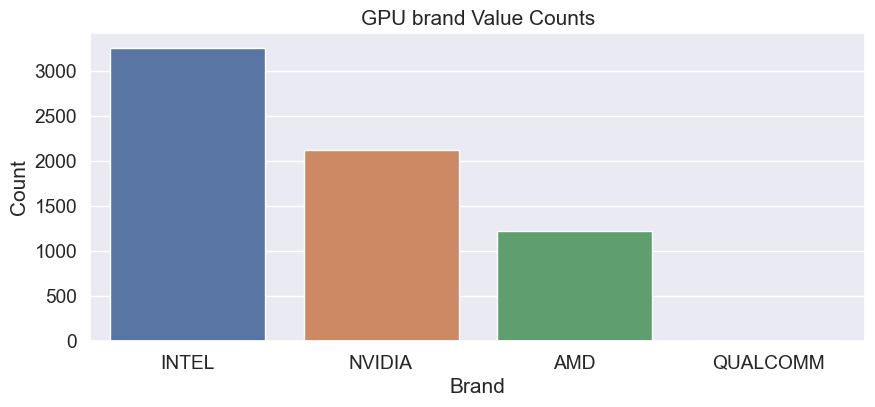

In [459]:
# plot brand value counts sorted
plt.figure(figsize=(10, 4))
sns.countplot(x=data['gpu_brand'], data=data,
              order=data['gpu_brand'].value_counts().index)
plt.title('GPU brand Value Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

## 2. Phân tích các cột dữ liệu số

In [460]:
num_data = data.drop(cat_cols, axis=1)
for col in num_data.columns:
    print(col)

price
ram
display_size
pixels
screen_rate
length
width
height
hdd
ssd
weight
cpu_point
gpu_point
fingerprint_reader
web_camera


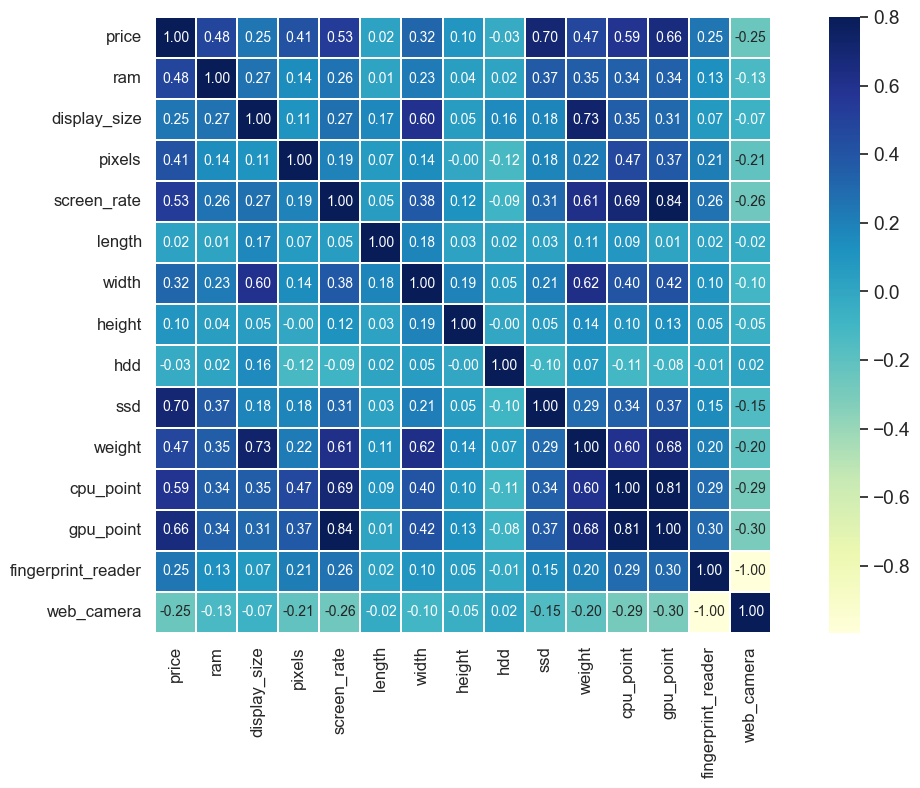

In [461]:
# plot heatmap for numerical columns
plt.figure(figsize=(15,8))
sns.heatmap(num_data.corr(), vmax=.8, linewidths=0.01, cbar=True, cmap='YlGnBu', linecolor="white", annot=True, square=True,
            fmt='.2f', annot_kws={'size': 10})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()


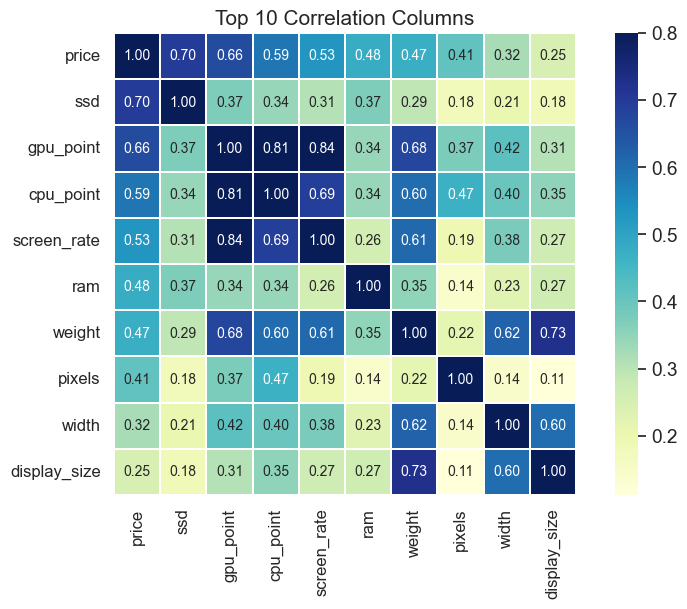

In [462]:
# print top 10 correlation columns and their correlation values
corr = num_data.corr()
corr_cols = corr.nlargest(10, 'price')['price'].index
corr_values = np.corrcoef(num_data[corr_cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10, 6))
hm = sns.heatmap(corr_values, vmax=.8, linewidths=0.01, cbar=True, cmap='YlGnBu', linecolor="white", annot=True, square=True,
                    fmt='.2f', annot_kws={'size': 10}, yticklabels=corr_cols.values, xticklabels=corr_cols.values)
# set lable size
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Top 10 Correlation Columns')
plt.show()

In [463]:
num_data.corr()['price'].sort_values(ascending=False)

price                 1.000000
ssd                   0.695278
gpu_point             0.664519
cpu_point             0.585258
screen_rate           0.529888
ram                   0.478324
weight                0.473092
pixels                0.410578
width                 0.322882
display_size          0.248198
fingerprint_reader    0.245071
height                0.096766
length                0.022023
hdd                  -0.031113
web_camera           -0.246114
Name: price, dtype: float64

Text(0.5, 1.0, 'SSD vs Price')

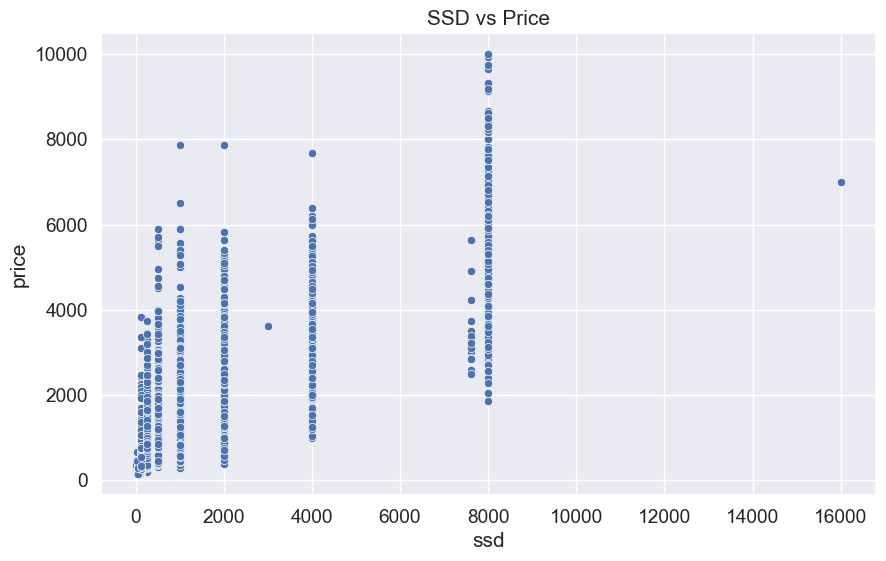

In [464]:
# plot scatter plot for price and ssd column
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ssd'], y=data['price'], data=data['price'])
plt.title('SSD vs Price')

In [465]:
def plot_num_data(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    sns.histplot(df[col], bins=50, ax=axes[0])
    # plot kde line
    sns.kdeplot(df[col], ax=axes[1])
    sns.boxplot(data=df, x=col, ax=axes[2])
    # plot mean line
    mean = df[col].mean()
    axes[0].axvline(mean, color='r', linestyle='--')
    axes[1].axvline(mean, color='r', linestyle='--')
    # set text size for axes
    for ax in axes:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        # set labels size
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
    
    plt.tight_layout()



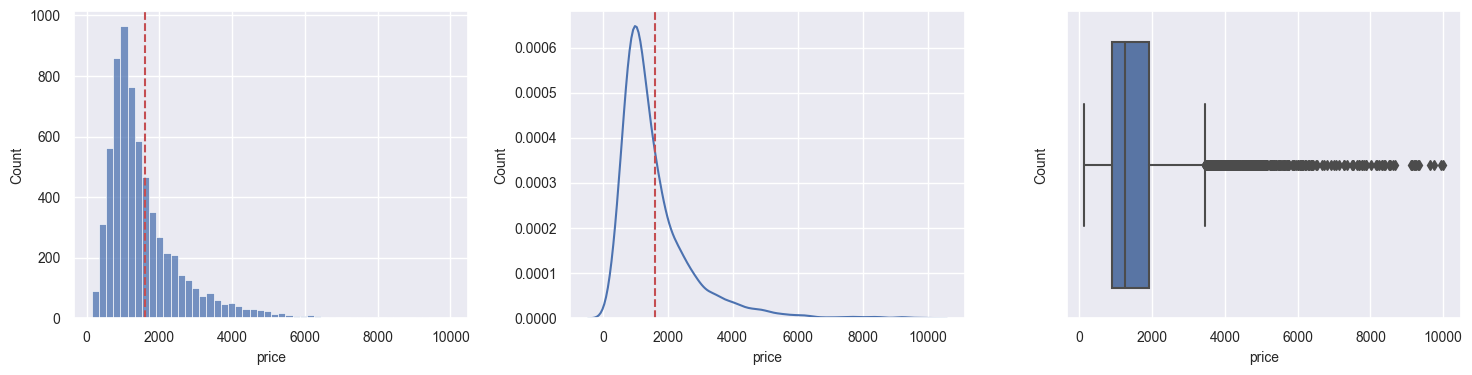

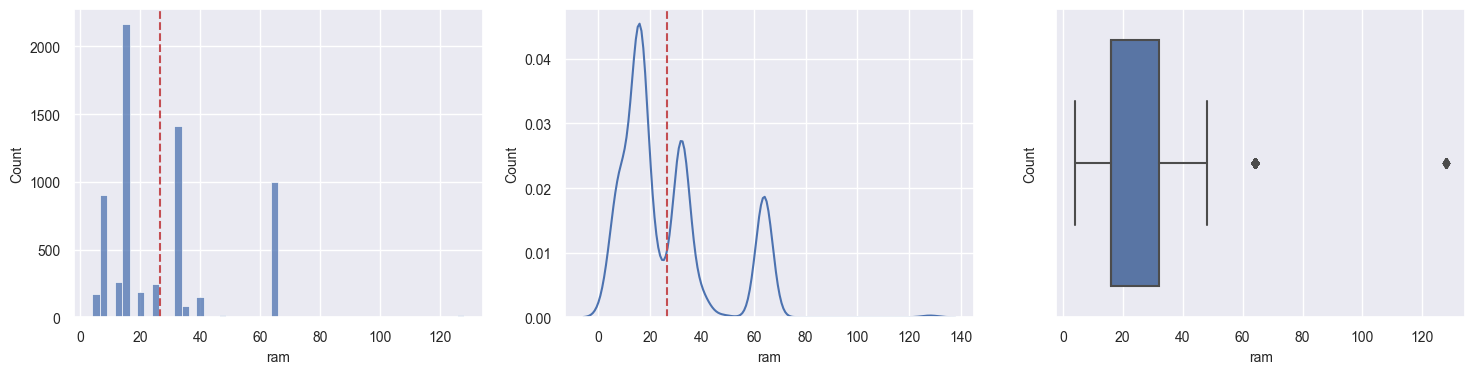

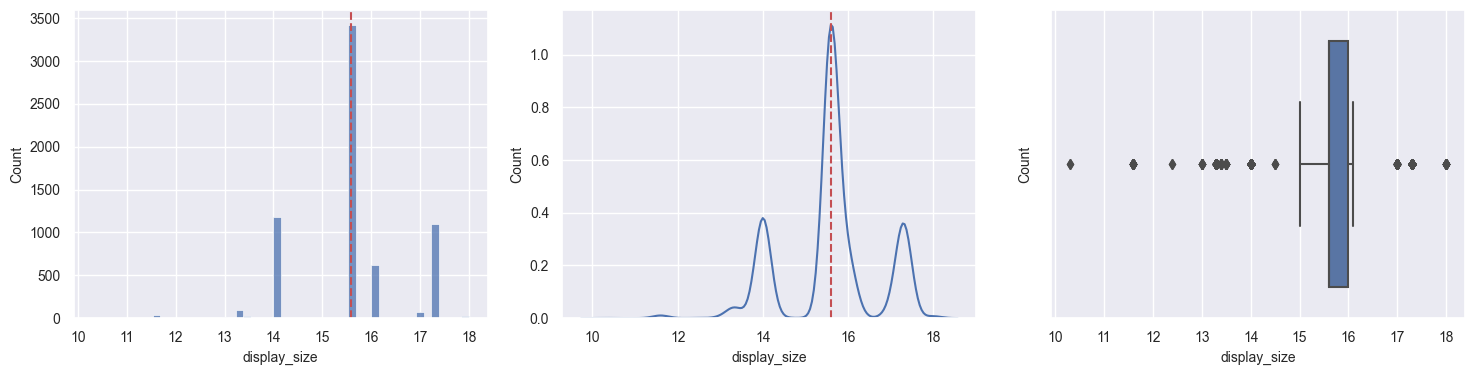

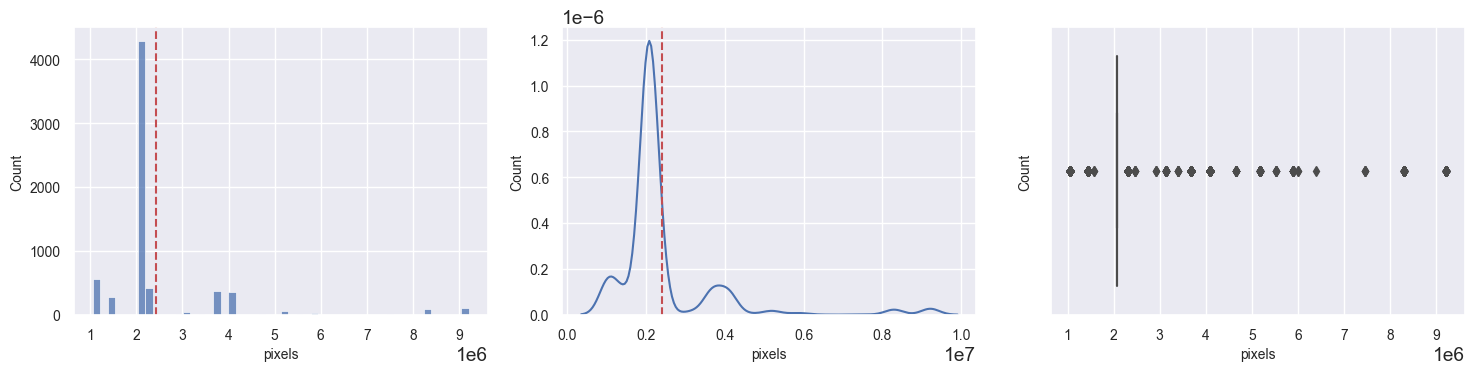

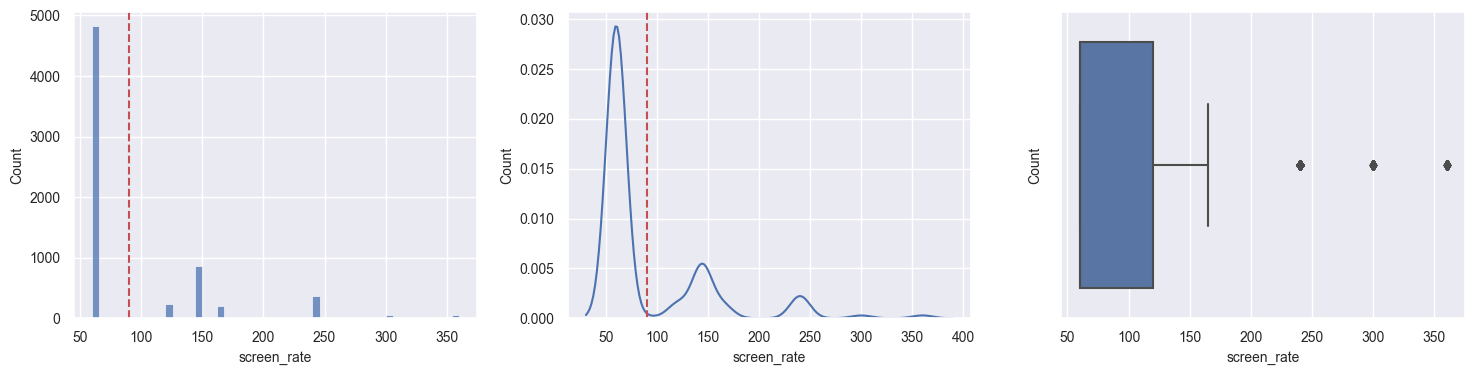

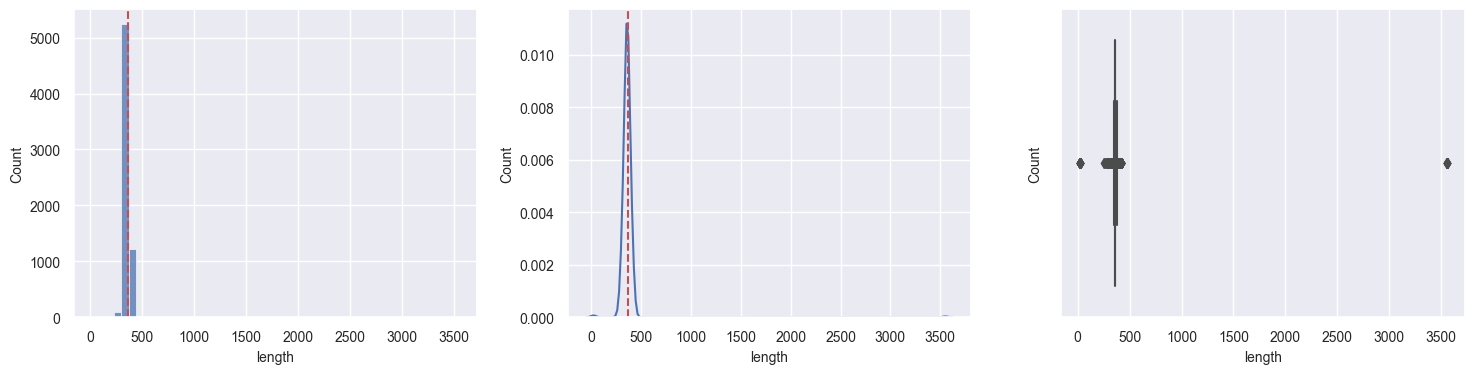

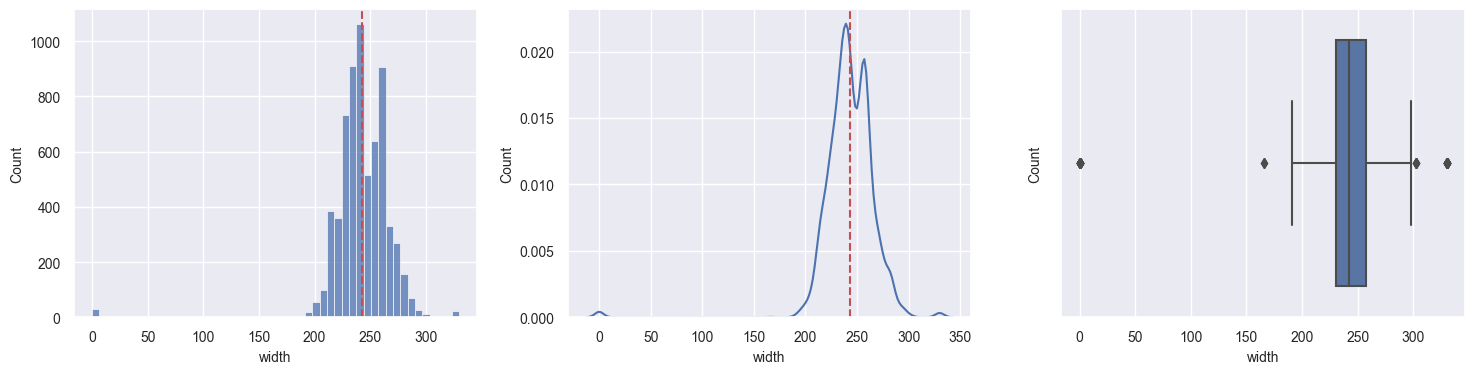

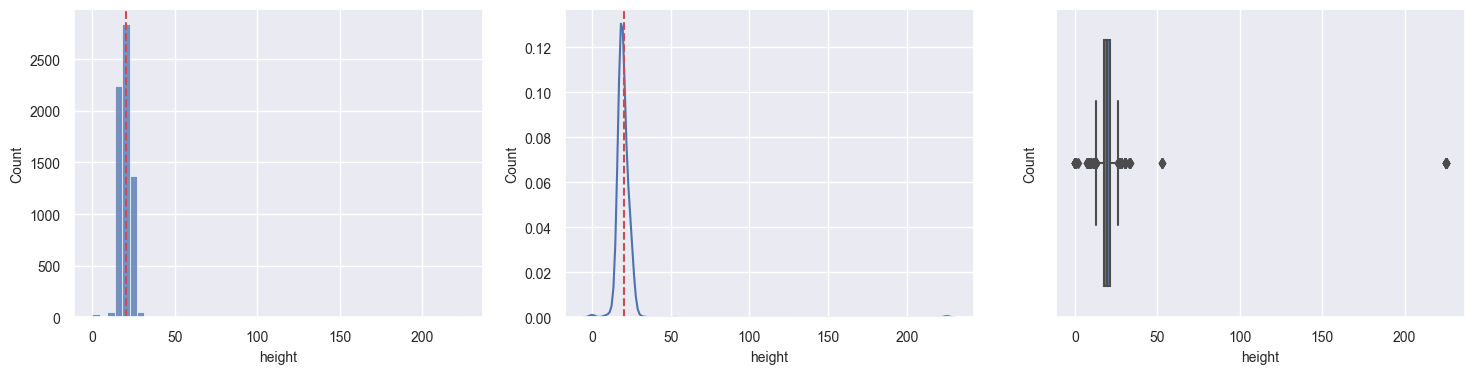

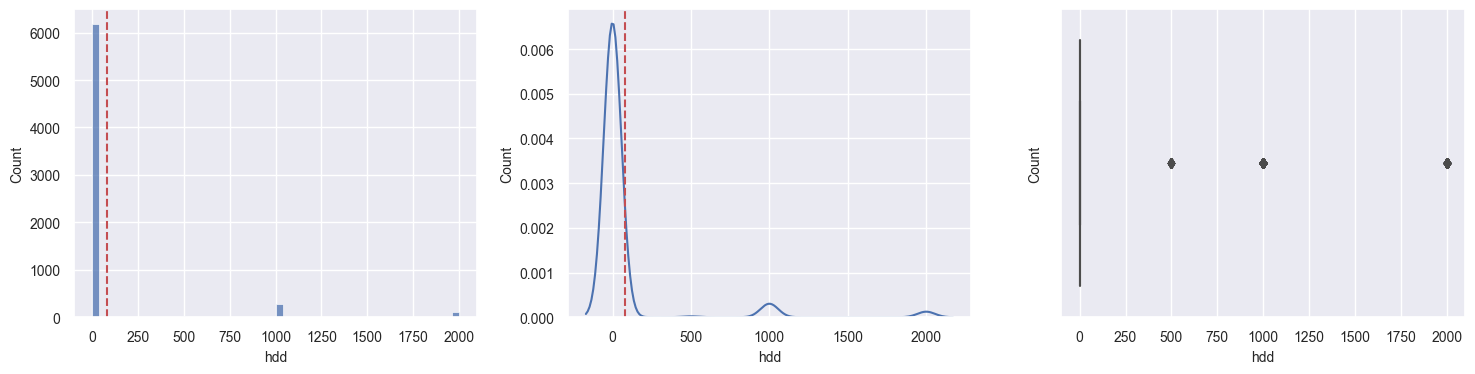

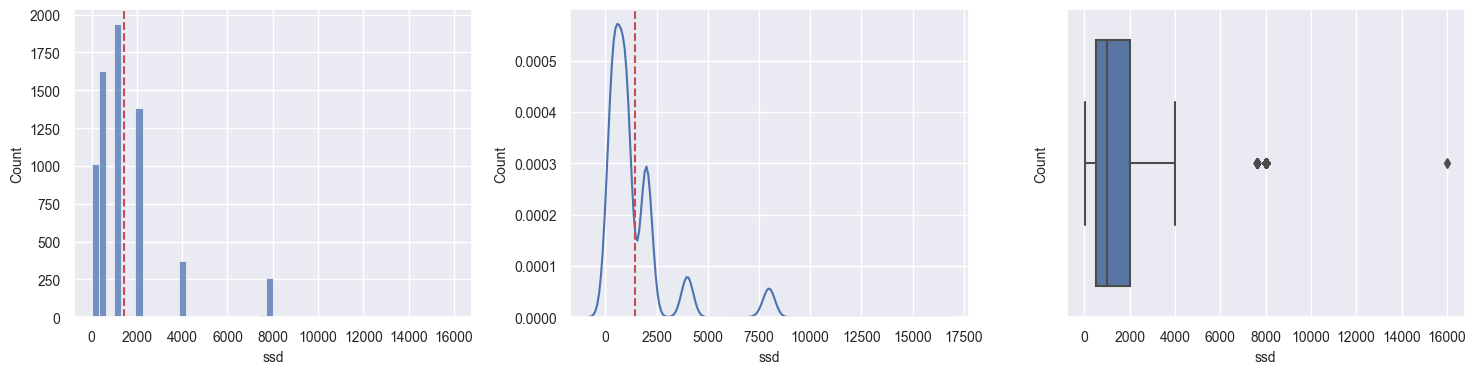

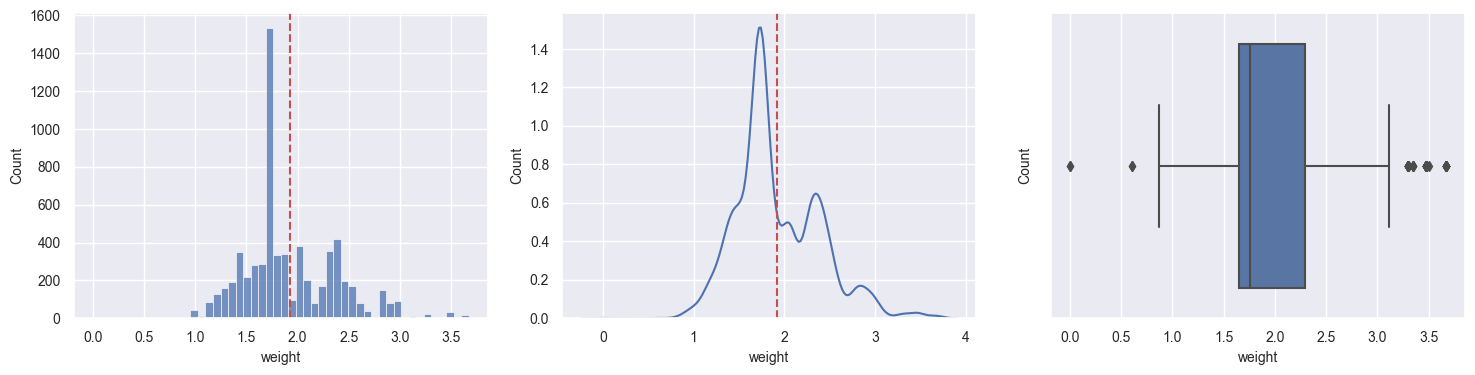

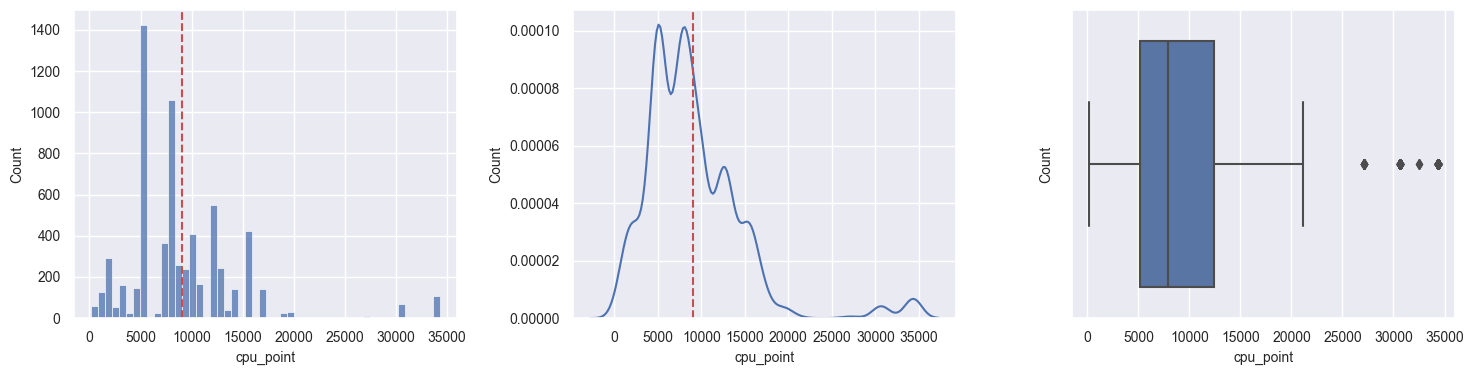

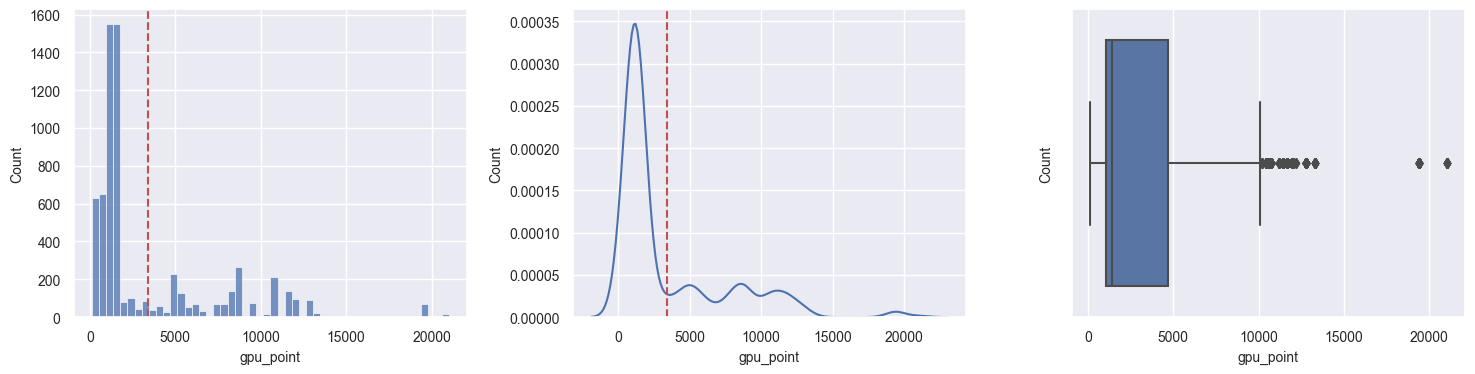

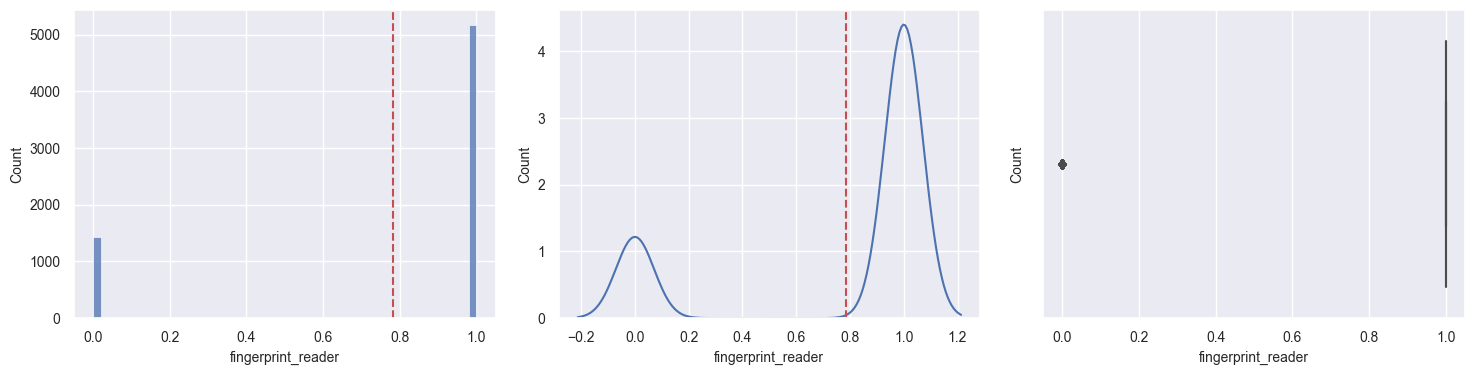

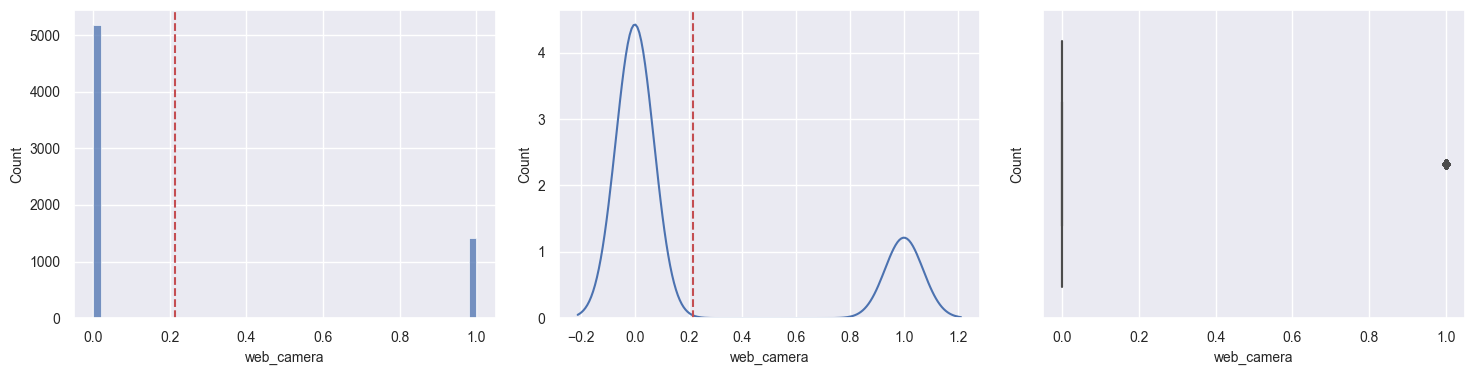

In [466]:
for col in num_data.columns:
    plot_num_data(data, col)


## 3. Mã hóa dữ liệu

In [467]:
df = data.copy()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.columns

Index(['price', 'ram', 'display_size', 'pixels', 'screen_rate', 'length',
       'width', 'height', 'hdd', 'ssd', 'weight', 'cpu_point', 'gpu_point',
       'fingerprint_reader', 'web_camera', 'brand_ALIENWARE', 'brand_AORUS',
       'brand_ASUS', 'brand_DELL', 'brand_DYNABOOK', 'brand_ENVY',
       'brand_GIGABYTE', 'brand_HP', 'brand_LENOVO', 'brand_LG',
       'brand_MICROSOFT', 'brand_MSI', 'brand_PANASONIC', 'brand_RAZER',
       'brand_SAMSUNG', 'ram_type_DDR5', 'ram_type_LPDDR3', 'ram_type_LPDDR4',
       'ram_type_LPDDR4X', 'ram_type_LPDDR5', 'display_type_2.5K',
       'display_type_2.8K', 'display_type_2K', 'display_type_3.2K',
       'display_type_3.5K', 'display_type_3K', 'display_type_3K2K',
       'display_type_4K UHD', 'display_type_4K UHD+', 'display_type_FHD',
       'display_type_FHD+', 'display_type_HD', 'display_type_HD+',
       'display_type_PIXELSENSE', 'display_type_QHD', 'display_type_QHD+',
       'display_type_UHD+', 'display_type_WQHD', 'display_type_WQHD+',

In [468]:
# conver to float
df = df.astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    6607 non-null   float64
 1   ram                      6607 non-null   float64
 2   display_size             6607 non-null   float64
 3   pixels                   6607 non-null   float64
 4   screen_rate              6607 non-null   float64
 5   length                   6607 non-null   float64
 6   width                    6607 non-null   float64
 7   height                   6607 non-null   float64
 8   hdd                      6607 non-null   float64
 9   ssd                      6607 non-null   float64
 10  weight                   6607 non-null   float64
 11  cpu_point                6607 non-null   float64
 12  gpu_point                6607 non-null   float64
 13  fingerprint_reader       6607 non-null   float64
 14  web_camera              

## 4. Lựa chọn thuộc tính

### 4.1 Correlation

In [469]:
X = df.drop('price', axis=1)
y = df['price']

In [470]:
# print shape of X and y
print(X.shape)

(6607, 65)


In [471]:
# function to calculate mean absolute percentage error to test model with feature engineering
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def test_model(X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return mean_absolute_percentage_error(y_test, y_pred)

In [472]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [473]:
err1 = test_model(X_train, X_test, y_train, y_test)
print('Mean Absolute Percentage Error:', err1)

Mean Absolute Percentage Error: 0.2725986472744334


In [474]:
# for i in range number of columns
err_list = []
for i in range(2, len(X.columns) + 2):
    best_col = df.corr()['price'].sort_values(ascending=False).head(i)
    best_col = best_col.drop('price')
    feat_col = best_col.index
    err = test_model(X_train[feat_col], X_test[feat_col], y_train, y_test)
    # print i and error
    # save i and error to list
    err_list.append((i, err))
    print("Err with ", i-1, "feat:", err)


Err with  1 feat: 0.4515318805248751
Err with  2 feat: 0.318655535721171
Err with  3 feat: 0.3092052352150283
Err with  4 feat: 0.30887597426229935
Err with  5 feat: 0.3065832751783901
Err with  6 feat: 0.28927146247263086
Err with  7 feat: 0.2901323517907717
Err with  8 feat: 0.2918986283709149
Err with  9 feat: 0.28177969364926053
Err with  10 feat: 0.2817598978549277
Err with  11 feat: 0.2823680816964488
Err with  12 feat: 0.282216349122005
Err with  13 feat: 0.28428177330889315
Err with  14 feat: 0.282567376736496
Err with  15 feat: 0.2824034109313548
Err with  16 feat: 0.27979176737026484
Err with  17 feat: 0.27985490003319763
Err with  18 feat: 0.28015866510345017
Err with  19 feat: 0.27998771196442446
Err with  20 feat: 0.2765854375637454
Err with  21 feat: 0.27632681801979386
Err with  22 feat: 0.276048867570973
Err with  23 feat: 0.2762755905151752
Err with  24 feat: 0.27593587332320885
Err with  25 feat: 0.2766345936161842
Err with  26 feat: 0.276820681538935
Err with  27 fea

Text(0.5, 1.0, 'Number of Features vs Error')

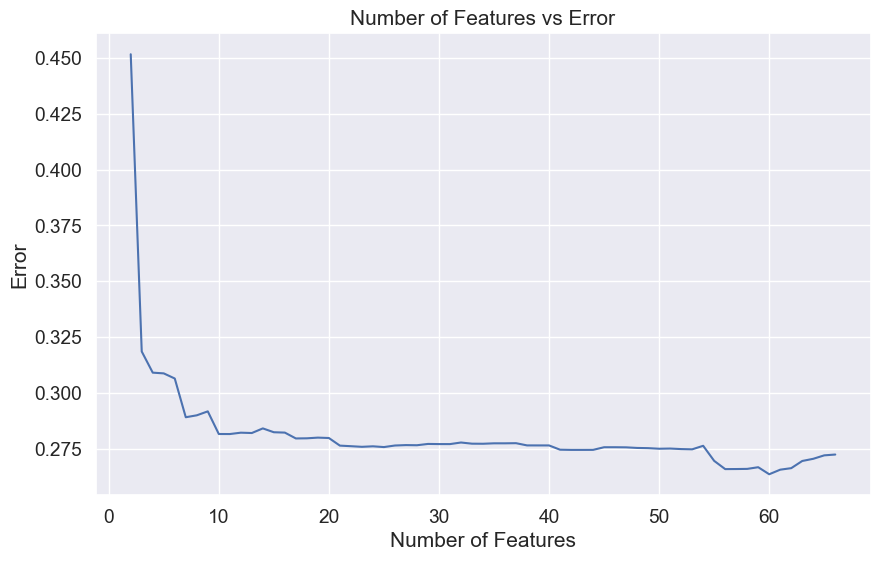

In [475]:
# plot error list
plt.figure(figsize=(10, 6))
plt.plot(*zip(*err_list))
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title('Number of Features vs Error')

In [476]:
# print min error and number of features that give min error
min_err = min(err_list, key=lambda x: x[1])
print("Min error:", min_err[1], "with", min_err[0]-1, "features")



Min error: 0.26378785052882686 with 59 features


### 4.2 PCA

In [477]:
from sklearn.decomposition import PCA
err_list2 = []
for i in range(1, 59):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    error = test_model(X_train_pca, X_test_pca, y_train, y_test)
    err_list2.append((i, error))
    print(f"PCA {i} => error = {error}")


PCA 1 => error = 0.5719931653113212
PCA 2 => error = 0.3894491141171012
PCA 3 => error = 0.3822483530349867
PCA 4 => error = 0.3004248703490231
PCA 5 => error = 0.2912315366316022
PCA 6 => error = 0.290939528148014
PCA 7 => error = 0.2899794468566031
PCA 8 => error = 0.2889474860451923
PCA 9 => error = 0.2739587017268113
PCA 10 => error = 0.27398018415434494
PCA 11 => error = 0.2787281510838488
PCA 12 => error = 0.27901068877316276
PCA 13 => error = 0.27794188087221794
PCA 14 => error = 0.2780145123433783
PCA 15 => error = 0.27679043298553735
PCA 16 => error = 0.2788115741127176
PCA 17 => error = 0.27702485390816356
PCA 18 => error = 0.27547458915146034
PCA 19 => error = 0.2727914654048641
PCA 20 => error = 0.2709790547708056
PCA 21 => error = 0.27073844378332856
PCA 22 => error = 0.27115551807955734
PCA 23 => error = 0.2705440981552368
PCA 24 => error = 0.27263696429771994
PCA 25 => error = 0.26929833175146334
PCA 26 => error = 0.2688534174566204
PCA 27 => error = 0.26864990330750216


Text(0.5, 1.0, 'Number of Features vs Error')

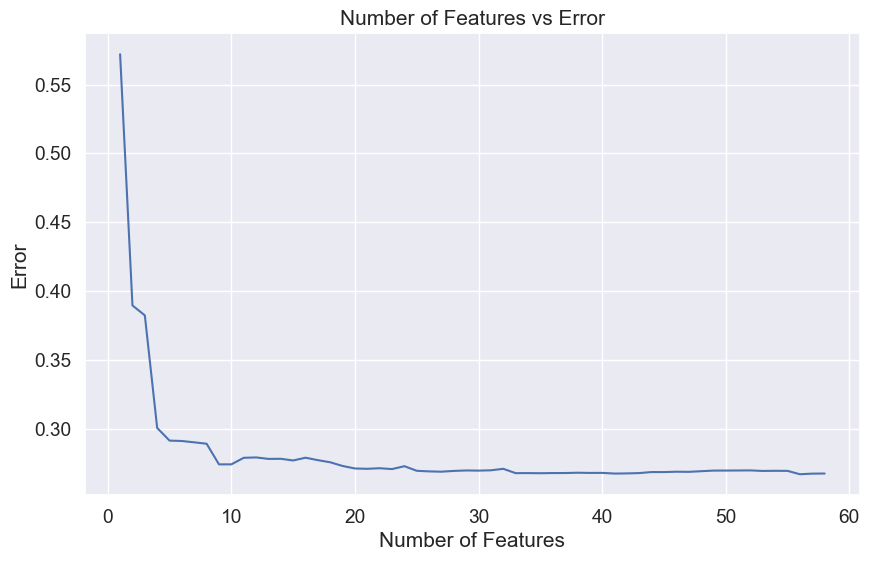

In [478]:
# plot error list
plt.figure(figsize=(10, 6))
plt.plot(*zip(*err_list2))
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title('Number of Features vs Error')


In [479]:
# print min error and number of features that give min error
min_err2 = min(err_list2, key=lambda x: x[1])
print("Min error:", min_err2[1], "with", min_err2[0]-1, "features")


Min error: 0.2667819601020847 with 55 features


PCA không giúp cải thiện hiệu suất mô hình

### 4.3 RFE

In [480]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
err_list3 = []
for i in range(1, 65):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    model = LinearRegression()
    rfe.fit(X_train, y_train)
    error = test_model(X_train[X_train.columns[rfe.support_]],
                    X_test[X_test.columns[rfe.support_]], y_train, y_test)
    err_list3.append((i, error))
    print(f"RFE {i} => error = {error}")


RFE 1 => error = 0.6725709021716836
RFE 2 => error = 0.6510461508358648
RFE 3 => error = 0.6503677663551095
RFE 4 => error = 0.5848864331611672
RFE 5 => error = 0.5840642650939337
RFE 6 => error = 0.5842723084730048
RFE 7 => error = 0.47529911912281936
RFE 8 => error = 0.47277210417942767
RFE 9 => error = 0.4679999074853656
RFE 10 => error = 0.4675570809037413
RFE 11 => error = 0.4645962932780148
RFE 12 => error = 0.44903007733982386
RFE 13 => error = 0.4370098386153511
RFE 14 => error = 0.4369345879298177
RFE 15 => error = 0.4352063946253186
RFE 16 => error = 0.4317876966387378
RFE 17 => error = 0.43233325470498996
RFE 18 => error = 0.4322751678033676
RFE 19 => error = 0.43348073502706524
RFE 20 => error = 0.43323393645392144
RFE 21 => error = 0.425546313018979
RFE 22 => error = 0.425433285278557
RFE 23 => error = 0.42485728707009796
RFE 24 => error = 0.42602592326388666
RFE 25 => error = 0.425702428357634
RFE 26 => error = 0.42554346203344445
RFE 27 => error = 0.41358097035844776
RFE

Text(0.5, 1.0, 'Number of Features vs Error')

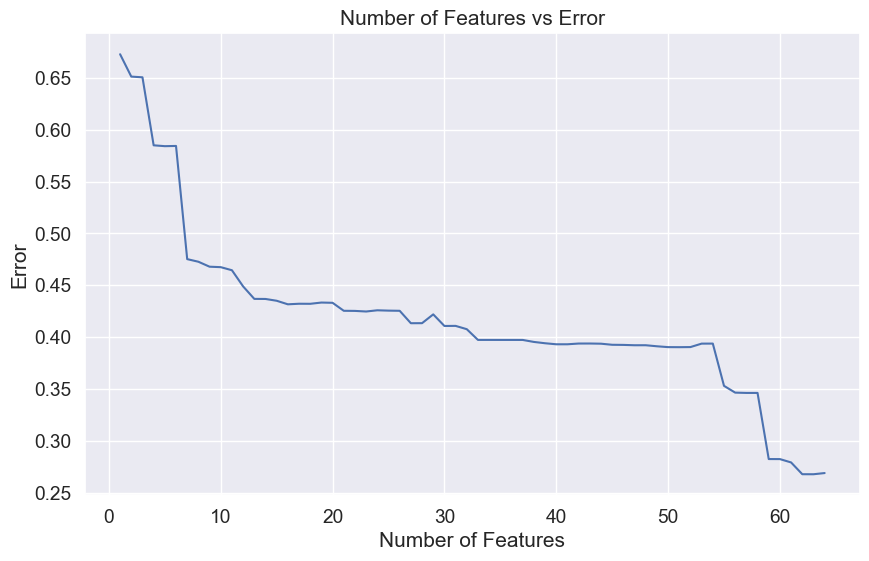

In [481]:
# plot error list
plt.figure(figsize=(10, 6))
plt.plot(*zip(*err_list3))
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title('Number of Features vs Error')


In [482]:
# print min error and number of features that give min error
min_err3 = min(err_list3, key=lambda x: x[1])
print("Min error:", min_err3[1], "with", min_err3[0]-1, "features")


Min error: 0.268151270393176 with 62 features


### 4.4 Kết luận

Dùng 59 cột với phương pháp correlation

In [499]:
best_col = df.corr()['price'].sort_values(ascending=False).head(59)
best_col = best_col.drop('price')
feat_col = best_col.index
X_train, X_test, y_train, y_test = train_test_split(X[feat_col], y, test_size=0.2, random_state=42)

## 5. Xử lý ngoại lệ và chuẩn hóa dữ liệu

### 4.1 Xử lý ngoại lệ

In [500]:
# xử lý ngoại lệ cho phân bố lệch
def outliers_for_skewed_distribution(df, col):
    res = df.copy()
    q3, q1 = np.percentile(res[col], [75, 25])
    IQR = q3 - q1
    upper_boundary = q3 + 1.5 * IQR
    lower_boundary = q1 - 1.5 * IQR
    res[col][res[col] >= upper_boundary] = upper_boundary
    res[col][res[col] <= lower_boundary] = lower_boundary
    return res


In [501]:
# xử lý ngoại lệ cho phân bố chuẩn
def outliers_for_normal_distribution(df, col):
  res = df.copy()
  q3, q1 = np.percentile(res[col], [75, 25])
  IQR = q3 - q1
  mean = res[col].mean()
  upper_boundary = mean + 1.5 * IQR
  lower_boundary = mean - 1.5 * IQR
  res[col][res[col] >= upper_boundary] = upper_boundary
  res[col][res[col] <= lower_boundary] = lower_boundary
  return res


Ta thấy hầu hết các cột đều có phân bố lệch

In [502]:
col_to_handle = ['price', 'ram', 'display_size', 'pixels', 'screen_rate', 'length',
                 'width', 'height', 'hdd', 'ssd', 'weight', 'cpu_point', 'gpu_point']
def handle_outliers(df):
    res = df.copy()
    for col in col_to_handle:
        if col != 'price':
            if res[col].skew() > 1:
                res = outliers_for_skewed_distribution(res, col)
            else:
                res = outliers_for_normal_distribution(res, col)
    return res

X_train = handle_outliers(X_train)
X_train.head()


,ssd,gpu_point,cpu_point,gpu_brand_NVIDIA,screen_rate,ram,ram_type_DDR5,weight,pixels,brand_MSI,...,brand_SAMSUNG,display_type_WUXGA,display_type_2K,display_type_2.5K,display_type_2.8K,hdd,display_type_HD+,ram_type_LPDDR4,ram_type_LPDDR4X,brand_DELL
5810,4000.0,10137.0,12390.0,1.0,144.0,16.0,0.0,2.380000,2073600.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1268,1000.0,1129.0,8919.0,0.0,60.0,24.0,0.0,1.640000,2073600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,4232.0,10137.0,19272.0,1.0,210.0,32.0,1.0,2.100000,2073600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4745,1000.0,1435.0,9933.0,0.0,60.0,32.0,0.0,1.910000,2073600.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
654,2000.0,10137.0,23287.5,1.0,210.0,32.0,1.0,2.897889,2073600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [503]:
# test error after handle outliers
err4 = test_model(X_train, X_test, y_train, y_test)
print('Mean Absolute Percentage Error:', err4)

Mean Absolute Percentage Error: 0.33235327696094735


### 4.2 Chuẩn hóa dữ liệu

In [508]:
col_to_handle = ['ram', 'display_size', 'pixels', 'screen_rate', 'length',
                 'width', 'height', 'hdd', 'ssd', 'weight', 'cpu_point', 'gpu_point']
# apply standard scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
# fit scaler on training data on col to handle
scaler.fit(X_train[col_to_handle])
# transform training data
X_train[col_to_handle] = scaler.transform(X_train[col_to_handle])

In [509]:
# transform testing data
scaler.fit(X_test[col_to_handle])
X_test[col_to_handle] = scaler.transform(X_test[col_to_handle])

In [510]:
# for col in col_to_handle:
#     plot_num_data(X_train, col)

In [511]:
# test error after standard scaler
err5 = test_model(X_train, X_test, y_train, y_test)
print('Mean Absolute Percentage Error:', err5)

Mean Absolute Percentage Error: 1920554182445.6921
